# Model inferences

In [53]:
import onnxruntime
import torch
import albumentations as A
import cv2
import numpy as np
from scipy.special import softmax

In [55]:
ONNX_MODEL_NAME = "onnx/modified_model_with_softmax_argmax.onnx"
DEVICE = 'cpu'
height = 224
width = 224
image_path = "../dataset/images/car/14526_1711012410201628198_A_0_6114.jpg"

labels = {0: 'bus',
          1:'car',
          2:'minibus',
          3:'minitruck',
          4:'trailer',
          5:'truck',
          6:'truck_trailer',
        }

In [56]:
image_bgr = cv2.imread(image_path)
image_arr = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
resize = A.Compose([
            A.Resize(height=height, width=width),
            A.Normalize()
        ])

input_data = resize(image = image_arr)
input_data = np.transpose(input_data["image"], (2, 0, 1))  # Перестановка осей
input_data = np.expand_dims(input_data, axis=0) # добавляем батч
print(input_data.shape)

(1, 3, 224, 224)


In [57]:
print(onnxruntime.get_available_providers())

['AzureExecutionProvider', 'CPUExecutionProvider']


In [58]:
providers = [
    # 'CUDAExecutionProvider',
    'CPUExecutionProvider',
]

onnx_session = onnxruntime.InferenceSession(
    ONNX_MODEL_NAME,
    providers=providers
)

print(f'{[input_.name for input_ in onnx_session.get_inputs()]}')
print(f'{[output_.name for output_ in onnx_session.get_outputs()]}')

['input']
['argmax_output']


In [59]:
input_name = onnx_session.get_inputs()[0].name
onnx_inputs = {input_name: input_data}

In [60]:
onnx_outputs = onnx_session.run(None, onnx_inputs)

output_data = onnx_outputs[0]

print(output_data)

[1]


In [31]:
probabilities = softmax(output_data)

# Вывод вероятностей и класса с наибольшей вероятностью
print("Softmax probabilities:", probabilities)

# Нахождение индекса класса с максимальной вероятностью
predicted_class = np.argmax(probabilities)
print("Predicted class:", predicted_class)

Softmax probabilities: [[0.01528037 0.9150469  0.01277049 0.01430784 0.01491489 0.01370074
  0.01397884]]
Predicted class: 1


In [37]:
cls = labels[predicted_class]

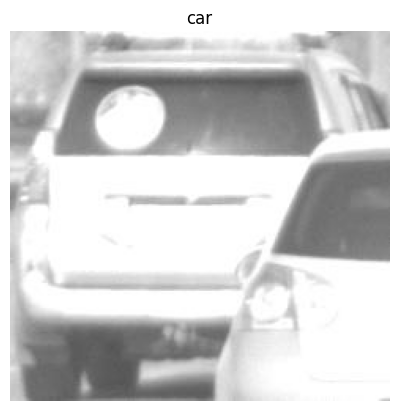

In [45]:
import matplotlib.pyplot as plt

plt.imshow(image_arr)
plt.title(f"{cls}")  
plt.axis("off")
plt.show()
